In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import torch
import json

# **Load and visualize the data**

In [0]:
# Pol
# Read Balanced train data set
pol_train_balanced = pd.read_csv("/content/gdrive/My Drive/HCLHackathon/Pol/pol_train-balanced.csv", delimiter='|')

In [28]:
pol_train_balanced.head()

,7vq9q,c07jfvv c07jy05,1 0
0,7xdys,c07o37s c07o350,1 0
1,bln1z,c0ndefe c0ndajx,1 0
2,bm9yo,c0nh0jw c0nhdes,1 0
3,bpkof,c0nyigy c0ny03s,0 1
4,bpuo1,c0nzcjq c0nz11j,0 1


In [29]:
#Check the column names
pol_train_balanced.columns

Index(['7vq9q', 'c07jfvv c07jy05', '1 0'], dtype='object')

In [0]:
# Rename column names
pol_train_balanced.columns = ["Comment_ID", "Response_ID", "Sent"]

In [31]:
# Check column names
pol_train_balanced.columns

Index(['Comment_ID', 'Response_ID', 'Sent'], dtype='object')

In [0]:
# Response_ID split
pol_train_balanced['Response_ID_1'], pol_train_balanced['Response_ID_2'] = pol_train_balanced['Response_ID'].str.split(' ', 1).str

In [33]:
pol_train_balanced.head()

,Comment_ID,Response_ID,Sent,Response_ID_1,Response_ID_2
0,7xdys,c07o37s c07o350,1 0,c07o37s,c07o350
1,bln1z,c0ndefe c0ndajx,1 0,c0ndefe,c0ndajx
2,bm9yo,c0nh0jw c0nhdes,1 0,c0nh0jw,c0nhdes
3,bpkof,c0nyigy c0ny03s,0 1,c0nyigy,c0ny03s
4,bpuo1,c0nzcjq c0nz11j,0 1,c0nzcjq,c0nz11j


In [0]:
# Sent column split
pol_train_balanced['Sent_1'], pol_train_balanced['Sent_2'] = pol_train_balanced['Sent'].str.split(' ', 1).str

In [35]:
pol_train_balanced.head()

,Comment_ID,Response_ID,Sent,Response_ID_1,Response_ID_2,Sent_1,Sent_2
0,7xdys,c07o37s c07o350,1 0,c07o37s,c07o350,1,0
1,bln1z,c0ndefe c0ndajx,1 0,c0ndefe,c0ndajx,1,0
2,bm9yo,c0nh0jw c0nhdes,1 0,c0nh0jw,c0nhdes,1,0
3,bpkof,c0nyigy c0ny03s,0 1,c0nyigy,c0ny03s,0,1
4,bpuo1,c0nzcjq c0nz11j,0 1,c0nzcjq,c0nz11j,0,1


In [36]:
# Splitting the data to combine
df1 = pol_train_balanced[['Response_ID_1','Sent_1']]
df1.columns = ['Response_ID','Sent']
df1.head()

,Response_ID,Sent
0,c07o37s,1
1,c0ndefe,1
2,c0nh0jw,1
3,c0nyigy,0
4,c0nzcjq,0


In [37]:
df2 = pol_train_balanced[['Response_ID_2','Sent_2']]
df2.columns = ['Response_ID','Sent']
df2.head()

,Response_ID,Sent
0,c07o350,0
1,c0ndajx,0
2,c0nhdes,0
3,c0ny03s,1
4,c0nz11j,1


In [38]:
# Appending both the data frames
frames = [df1, df2]
df_pol_train_balanced = pd.concat(frames)
df_pol_train_balanced.head()

,Response_ID,Sent
0,c07o37s,1
1,c0ndefe,1
2,c0nh0jw,1
3,c0nyigy,0
4,c0nzcjq,0


In [39]:
# Checking both the data frames has same text
df2.tail()

,Response_ID,Sent
6828,dfo8p3c,0
6829,dfo8uhn,0
6830,dfo3g3q,0
6831,dfom6aq,0
6832,dfopsjq,0


In [40]:
df_pol_train_balanced.tail()

,Response_ID,Sent
6828,dfo8p3c,0
6829,dfo8uhn,0
6830,dfo3g3q,0
6831,dfom6aq,0
6832,dfopsjq,0


In [41]:
# Checking shapes - Verifying data is cpoied properly
df1.shape

(6833, 2)

In [42]:
df2.shape

(6833, 2)

In [43]:
df_pol_train_balanced.shape

(13666, 2)

In [44]:
# Check the size
6833 * 2

13666

In [0]:
# Read JSON File 
import json
with open("/content/gdrive/My Drive/HCLHackathon/Pol/pol_comments.json") as datafile:
    data = json.load(datafile)
jsondf = pd.DataFrame(data)

In [46]:
jsondf.head()

,7uxqr,7vewt,7vq9q,c07jfvv,7w0as,c07kq5w,c07myx2,7xdys,c07o37s,7xvzm,c07pjk9,7z0nk,c07sjyk,7yyaz,c07sfaw,c07sm7t,7z7hw,7zvg8,80wd4,80vzb,c07xxny,c07xqxg,810dp,c07ybvh,bltf2,bln1z,c0ndefe,blmz9,c0nef9o,blkjp,c0ndjwc,bm15z,bm9yo,c0nh0jw,c0njm87,bn9p8,c0nm04k,c0np2r8,bntmy,c0no6f5,...,dfo7t8p,dfo84qp,dfo84v1,dfo8c7a,dfo8fg5,dfo8lgc,dfo8m59,dfo8nge,dfo8peg,dfo8shw,dfo8sr4,dfo8y4v,dfo91pb,dfoggt6,dfopsjq,dfoadrb,dfo4ki8,dfo4o7r,dfo4oxt,dfo56u4,dfo63au,dfo668l,dfo814j,dfo5b9t,dfo5l5q,dfo6kqt,dfo75zi,dfo7pdt,dfo7un5,dfo8bdd,dfo8g7h,dfobbf5,dfobfya,dfodzhb,dfoj9nf,dfonlqv,dfoowqx,dfp42jx,dfo8ni3,dfo8us6
text,Nancyt Pelosi messes up.. 500 Million Jobs los...,"Netflix CEO: ""Please raise my taxes""",The Six Million Dead Jews of World War ONE!,"Oh right, *both* wars were just jewish conspir...",GOP says it is necessary to spend my tax dolla...,DO NOT QUESTION THE HIVE MIND!,"Yup, all Republicans think exactly the same way.",WSJ begins the Jeb Bush campaign for 2016,Good luck with that.,Breaking a crucial campaign promise: Obama Def...,"Right, lets wait 4 more years until he can pro...","Cop Who Shoved Cyclist Fired by NYPD, Faces 4 ...",This is why folks are getting arrested for tak...,"OK, I understand why food prices went up last ...",Nobody forces you to either eat at a restauran...,But if there is a demand for cheaper soda capi...,Obama Discovers $2.7 Trillion Hole After Endin...,Obama is right to take on the very rich~They'r...,"Sean Hannity, Bad American","When their efforts failed, as they usually did...","Well yeah, but it'll work this time.","We can't have that, because politicians know s...",Poor Joe the Plumber Looks Lonely at His Own B...,yeah i am sure we all feel real sorry for dumb...,CNN's New Star - Erick Erickson will pull 'wif...,Chart showing how people's political views cha...,And this is exactly why I approve of death pan...,Fox &amp; Friends wants to know: Why aren't th...,If they can change their name to Topeka they c...,"Whenever some commenter claims Obama ""forgot h...",How about the promise that he was going to be ...,"Fact Check: IRS NOT Hiring 16,500 Agents To En...",Pope's immunity could be challenged in Britain,This is pure xenophobia against Vaticanians!,they hate our freedom to choose Coke or Pepsi!,It's Michelle Bachman's birthday.Sign her card...,"Don't worry, they're protecting our self-right...",The free market would lead the workers and cus...,The Bizarre World Of Left-Wing Rage,"But that was the god Reagan, and this is some ...",...,No one knew that good people would push back a...,He retreated back into his safe space.,"""The wheels on the bus are falling off, fallin...","...with his tail between his legs, fat, senile...",Trump really needs a medical examination by so...,Remember folks; how they treat the press's que...,He had a good relaxing life as an old rich guy...,What a feckless coward Donny is.,Cutting a tee time close?,"I know it's off topic, but Pence would probabl...","Wait, all we need to do to block his shitty pr...","He had to run, Fox and Friends was almost on.",Probably had to poop.,That's an insult to Arby's.,I read on Reddit the other day that Arby's emp...,Just so he didn't have to answer questions,The punchline is that he left when a journo as...,He doesn't like this Russian investigation Lik...,He was just in a hurry to get to the golf course.,"Good, I hope he doesn't sign anything else ever",Our president is a bafoon and a grifter.,Obviously a sign of profound confidence,Hm.,"If you inherited money you inherited wisdom, s...",Well his dad did go to prison for tax evasion ...,As a silver spooned New Yorker I'm sure he is ...,There is a reason that we haven't had a war am...,This is why everybody needs nukes!,What kind of wars has this guy been involved in?,Well we've only had one war that was fought wi...,"On the other hand, we wouldn't be living under...",I was just wondering what to watch on TV and f...,"Our spiral into a banana republic continues, I...",There's always money 

In [0]:
pol_jdf = jsondf.transpose()

In [48]:
pol_jdf.columns

Index(['text', 'author', 'score', 'ups', 'downs', 'date', 'created_utc',
       'subreddit'],
      dtype='object')

In [49]:
pol_jdf.head()

,text,author,score,ups,downs,date,created_utc,subreddit
7uxqr,Nancyt Pelosi messes up.. 500 Million Jobs los...,Fishbum,0,2,4,2009-02,1233788424,politics
7vewt,"Netflix CEO: ""Please raise my taxes""",jdl2003,1733,1985,252,2009-02,1233940024,politics
7vq9q,The Six Million Dead Jews of World War ONE!,[deleted],0,20,23,2009-02,1234070398,politics
c07jfvv,"Oh right, *both* wars were just jewish conspir...",Erobern,6,6,0,2009-02,1234070581,politics
7w0as,GOP says it is necessary to spend my tax dolla...,fangolo,891,1058,167,2009-02,1234194112,politics


In [0]:
pol_jdf.index.name = "Response_ID"

In [51]:
pol_jdf.head()

,text,author,score,ups,downs,date,created_utc,subreddit
Response_ID,,,,,,,,
7uxqr,Nancyt Pelosi messes up.. 500 Million Jobs los...,Fishbum,0,2,4,2009-02,1233788424,politics
7vewt,"Netflix CEO: ""Please raise my taxes""",jdl2003,1733,1985,252,2009-02,1233940024,politics
7vq9q,The Six Million Dead Jews of World War ONE!,[deleted],0,20,23,2009-02,1234070398,politics
c07jfvv,"Oh right, *both* wars were just jewish conspir...",Erobern,6,6,0,2009-02,1234070581,politics
7w0as,GOP says it is necessary to spend my tax dolla...,fangolo,891,1058,167,2009-02,1234194112,politics


In [0]:
# Combine the data
pol_comb = pd.merge(df_pol_train_balanced, pol_jdf, left_on="Response_ID", right_on="Response_ID")

In [53]:
pol_comb.head()

,Response_ID,Sent,text,author,score,ups,downs,date,created_utc,subreddit
0,c07o37s,1,Good luck with that.,Mastrmind,2,2,0,2009-02,1234642047,politics
1,c0ndefe,1,And this is exactly why I approve of death pan...,Deep-Thought,3,3,0,2010-04,1270224074,politics
2,c0nh0jw,1,This is pure xenophobia against Vaticanians!,sge_fan,1,1,0,2010-04,1270404022,politics
3,c0nyigy,0,Clinton's budget surpluses = the post-CW Peace...,[deleted],1,1,0,2010-04,1271073071,politics
4,c0nzcjq,0,Teabagging apperently just the tip of the iceberg,mothereffingteresa,5,5,0,2010-04,1271101055,politics


In [0]:
# Splitting words with space and counting the words
polb_reviews = pol_comb.loc[:, "text"].astype(str)
polb_labels = pol_comb.loc[:,"Sent"]

In [73]:
polb_reviews.head()

0                                 Good luck with that.
1    And this is exactly why I approve of death pan...
2         This is pure xenophobia against Vaticanians!
3    Clinton's budget surpluses = the post-CW Peace...
4    Teabagging apperently just the tip of the iceberg
Name: text, dtype: object

In [74]:
type(polb_reviews)

pandas.core.series.Series

In [75]:
polb_labels.head()

0    1
1    1
2    1
3    0
4    0
Name: Sent, dtype: object

# **Data Processing — convert to lower case**

In [76]:
# Converted to Lower Case
polb_reviews = polb_reviews.str.lower()
polb_reviews.head()

0                                 good luck with that.
1    and this is exactly why i approve of death pan...
2         this is pure xenophobia against vaticanians!
3    clinton's budget surpluses = the post-cw peace...
4    teabagging apperently just the tip of the iceberg
Name: text, dtype: object

# **Data Processing — Remove punctuation**

In [77]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [99]:
# Removing Punctuations
all_polb_text = '\n'.join([c for c in polb_reviews if c not in punctuation])
all_polb_text

'good luck with that.\nand this is exactly why i approve of death panels.\nthis is pure xenophobia against vaticanians!\nclinton\'s budget surpluses = the post-cw peace dividend bush\'s budget deficits = the post-911 war on terrorism obama\'s budget deficits = the post-rage socialist takeover ps--dailykos is a supreme example of charlatan targeting of a public that has been methodically dumbed down by the education system\'s key players\nteabagging apperently just the tip of the iceberg\nwho ever heard of a volcano causing problems for people?\nit\'s to enhance our freedom of speech\nyah, at that point they don\'t even count as people anymore!\nas a person the cop wouldn\'t of opened his fucking mouth.\nit doesn\'t but you cannot get upvotes unless you sensationalize the headline.\nkind of hard to give anal sex an even worse name but as it turns out most anything is possible.\nbecause if we don\'t fight the wars, the terrorists win.\nu mad?\nwhere are *our* jobs?\nscum tends to stay ne

# **Data Processing — Create list of reviews**

In [100]:
# Splitting the reviews
polb_reviews_split = all_polb_text.split('\n')
print ('Number of reviews :', len(polb_reviews_split))

Number of reviews : 13666


# **Tokenize — Create Vocab to Int mapping dictionary**

In [101]:
from collections import Counter
polb_all_text2 = ' '.join(polb_reviews_split)
# create a list of words
words = polb_all_text2.split()
# Count all the words using Counter Method
polb_count_words = Counter(words)

polb_total_words = len(words)
polb_sorted_words = polb_count_words.most_common(polb_total_words)

# Have a look at the count words
print (polb_count_words)

Counter({'the': 6514, 'to': 4049, 'a': 3329, 'of': 2659, 'is': 2607, 'and': 2411, 'that': 2027, 'in': 1681, 'this': 1575, 'i': 1552, 'for': 1509, 'be': 1199, 'he': 1136, 'it': 1130, 'are': 1095, 'you': 1076, 'they': 1071, 'but': 952, 'have': 874, 'so': 867, 'just': 839, 'not': 821, 'on': 814, 'with': 801, 'trump': 770, 'we': 765, 'all': 758, 'will': 740, 'if': 738, 'was': 671, 'what': 670, 'like': 653, 'as': 648, 'because': 636, "it's": 632, 'people': 615, 'his': 577, 'about': 552, 'who': 532, 'how': 531, 'would': 522, 'at': 513, 'can': 497, "i'm": 469, 'their': 469, 'from': 455, "don't": 453, 'an': 444, 'no': 441, 'more': 440, 'has': 429, 'should': 404, 'by': 399, 'sure': 392, 'get': 385, 'do': 384, 'when': 377, 'or': 374, 'only': 370, 'why': 364, 'out': 355, 'up': 351, 'one': 327, "that's": 320, "he's": 314, 'going': 311, 'well': 304, 'good': 299, 'she': 293, 'those': 291, 'than': 288, 'them': 280, 'there': 276, 'really': 274, 'my': 273, 'know': 269, 'your': 268, 'her': 265, 'hillary

In [102]:
# Vocabilary
# Starting from 1
polb_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(polb_sorted_words)}
print (polb_vocab_to_int)

{'the': 1, 'to': 2, 'a': 3, 'of': 4, 'is': 5, 'and': 6, 'that': 7, 'in': 8, 'this': 9, 'i': 10, 'for': 11, 'be': 12, 'he': 13, 'it': 14, 'are': 15, 'you': 16, 'they': 17, 'but': 18, 'have': 19, 'so': 20, 'just': 21, 'not': 22, 'on': 23, 'with': 24, 'trump': 25, 'we': 26, 'all': 27, 'will': 28, 'if': 29, 'was': 30, 'what': 31, 'like': 32, 'as': 33, 'because': 34, "it's": 35, 'people': 36, 'his': 37, 'about': 38, 'who': 39, 'how': 40, 'would': 41, 'at': 42, 'can': 43, "i'm": 44, 'their': 45, 'from': 46, "don't": 47, 'an': 48, 'no': 49, 'more': 50, 'has': 51, 'should': 52, 'by': 53, 'sure': 54, 'get': 55, 'do': 56, 'when': 57, 'or': 58, 'only': 59, 'why': 60, 'out': 61, 'up': 62, 'one': 63, "that's": 64, "he's": 65, 'going': 66, 'well': 67, 'good': 68, 'she': 69, 'those': 70, 'than': 71, 'them': 72, 'there': 73, 'really': 74, 'my': 75, 'know': 76, 'your': 77, 'her': 78, 'hillary': 79, 'make': 80, 'him': 81, 'think': 82, 'obama': 83, 'our': 84, "can't": 85, 'us': 86, 'these': 87, 'any': 88

# **Tokenize — Encode the words**

In [103]:
# Index mapping Dictionary
polb_reviews_int = []
for review in polb_reviews_split:
    r = [polb_vocab_to_int[w] for w in review.split()]
    polb_reviews_int.append(r)
print (polb_reviews_int[0:3])

[[68, 1228, 24, 373], [6, 9, 5, 411, 60, 10, 1969, 4, 451, 7981], [9, 5, 1148, 7982, 150, 7983]]


# **Tokenize — Encode the labels**

In [104]:
polb_encoded_labels = np.array(labels)
polb_encoded_labels

array(['1', '1', '1', ..., '0', '0', '0'], dtype=object)

# **Analyze Reviews Length**

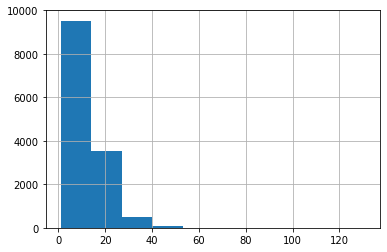

count    13666.000000
mean        11.330601
std          7.794978
min          1.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        131.000000
dtype: float64

In [105]:
import matplotlib.pyplot as plt
%matplotlib inline
polb_reviews_len = [len(x) for x in polb_reviews_int]
pd.Series(polb_reviews_len).hist()
plt.show()
pd.Series(polb_reviews_len).describe()

On an average messages length is 11, some messages has length 1. Some messages are quite long like 131 words. so its better to remove outliers.

# **Removing Outliers — Getting rid of extremely long or short reviews**

In [0]:
polb_reviews_int = [ polb_reviews_int[i] for i, l in enumerate(polb_reviews_len) if l>0 ]
polb_encoded_labels = [ polb_encoded_labels[i] for i, l in enumerate(polb_reviews_len) if l> 0 ]

# **Padding / Truncating the remaining data**

In [0]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [126]:
polb_features = pad_features(polb_reviews_int, 29)
print (polb_features)
print (len(polb_features))
print (type(polb_features))
print (type(polb_encoded_labels))
polb_encoded_labels = np.asarray(polb_encoded_labels)
print (type(polb_encoded_labels))

[[    0     0     0 ...  1228    24   373]
 [    0     0     0 ...     4   451  7981]
 [    0     0     0 ...  7982   150  7983]
 ...
 [    0     0     0 ...  1422  1589 21250]
 [    0     0     0 ...   759  1398  7980]
 [    0     0     0 ...  7245    20  6341]]
13666
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# **Training, Validation, Test Dataset Split**

In [127]:
split_frac = 0.8
len_feat = len(polb_features)
polb_train_x = torch.from_numpy(polb_features[0:int(split_frac*len_feat)])
polb_train_y = torch.from_numpy(polb_encoded_labels[0:int(split_frac*len_feat)])
polb_vald_x = torch.from_numpy(polb_features[int(split_frac*len_feat):])
polb_vald_y = torch.from_numpy(polb_encoded_labels[int(split_frac*len_feat):])

print (type(polb_train_x))
print (type(polb_train_y))
print (type(polb_vald_x))
print (type(polb_vald_y))

TypeError: ignored

# **Dataloaders and Batching**

In [121]:
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
polb_train_data = TensorDataset(torch.from_numpy(polb_train_x), torch.from_numpy(polb_train_y))
polb_valid_data = TensorDataset(torch.from_numpy(polb_valid_x), torch.from_numpy(polb_valid_y))
#test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
polb_train_loader = DataLoader(polb_train_data, shuffle=True, batch_size=batch_size)
polb_valid_loader = DataLoader(polb_valid_data, shuffle=True, batch_size=batch_size)
#test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

TypeError: ignored

# **Define the LSTM Network Architecture**

# **Define the Model Class**

# **Training the Network**

# **Testing (on Test data and User- generated data)**